### Trade like a Pro with Keltner channels

In [1]:
# Description: This program uses the Keltner Channel Trading Strategy to Buy and Sell an asset.

In [3]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [14]:
# Create a function to calculate the Keltner Channel
def keltner_channels(data, window=20, atr_multiplier=1):
    # Create an empty dictionary 
    keltner_channels = {}
    
    # Calculate the typical price
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    
    # Calculate the exponential moving average
    exponential_moving_average = typical_price.ewm(span=window, adjust=False).mean()
    
    # Calculate the Average True Range (ATR)
    true_range = np.maximum(data['High'] - data['Low'], np.maximum(abs(data['High'] - exponential_moving_average), abs(data['Low'] - exponential_moving_average)))
    average_true_range = true_range.ewm(span=window, adjust=False).mean()
    
    # Calculate the Keltner Channel Upper and Lower Bands
    keltner_channels['upper'] = exponential_moving_average + atr_multiplier * average_true_range
    keltner_channels['lower'] = exponential_moving_average - atr_multiplier * average_true_range
    
    # Calculate the Keltner Channel Middle Band
    keltner_channels['middle'] = exponential_moving_average
    
    return keltner_channels

In [15]:
# Create a function to plot the Keltner Channel
def plot_keltner_channels(data, keltner_channels):
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Plot the data
    ax.plot(data.index, data['Close'], label='Close')

    # Plot the Keltner Channel Upper, Middle and Lower Bands
    ax.plot(keltner_channels['upper'], label="Upper Band")
    ax.plot(keltner_channels['middle'], label="Middle Band")
    ax.plot(keltner_channels['lower'], label="Lower Band")

    # Shade the area between the bands
    ax.fill_between(keltner_channels['upper'].index, keltner_channels['upper'], keltner_channels['lower'], color='grey', alpha=0.5)

    # Plot the buy and sell signals
    crossed=False
    buy_signal_number=0
    sell_signal_number=0
    buy_signal_restraint=1
    sell_signal_restraint=1

    for i in range(0, len(data)):
        if data['Close'].iloc[i] < keltner_channels['lower'].iloc[i]:
            buy_signal_number = buy_signal_number + 1
            sell_signal_number = 0
            if buy_signal_number >= buy_signal_restraint and crossed==False:
                ax.plot(data.index[i], data['Close'].iloc[i], marker='^', markersize=10, color='green')
                crossed=True
                buy_signal_number = 0
            elif data['Close'].iloc[i] > keltner_channels['upper'].iloc[i]:
                sell_signal_number = sell_signal_number + 1
                buy_signal_number = 0
                if sell_signal_number >= sell_signal_restraint and crossed==True:
                    ax.plot(data.index[i], data['Close'].iloc[i], marker='v', markersize=10, color='red')
                    crossed=False
                    sell_signal_number = 0
    # Format the plot
    ax.set_title("Keltner channels with Buy/Sell Signals")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    plt.show()

In [16]:
# Read in the data
df = yf.download(tickers='AAPL', start='2022-12-05', end='2023-12-05')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.263748,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,141.578400,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,139.626770,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,141.320831,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,140.835403,76097000
...,...,...,...,...,...,...
2023-11-28,189.779999,191.080002,189.399994,190.399994,189.680222,38415400
2023-11-29,190.899994,192.089996,188.970001,189.369995,188.654129,43014200
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.231934,48794400


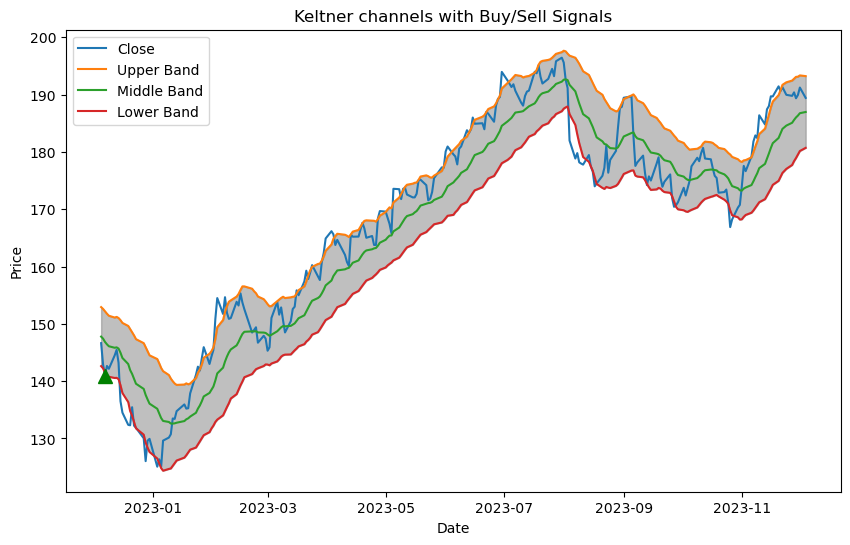

In [17]:
# Get the Keltner channels
keltner_channels = keltner_channels(df, window=20, atr_multiplier=1)
# Plot the data and the keltner channels
plot_keltner_channels(df, keltner_channels)